## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
dataset = pd.read_csv('shop data.csv')
dataset.head(10)

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       22 non-null     object
 1   income    22 non-null     object
 2   gender    22 non-null     object
 3   m_status  22 non-null     object
 4   buys      22 non-null     object
dtypes: object(5)
memory usage: 1008.0+ bytes


In [4]:
dataset.shape

(22, 5)

In [6]:
dataset.describe()

,age,income,gender,m_status,buys
count,22,22,22,22,22
unique,3,3,2,2,2
top,<25,medium,male,single,yes
freq,9,9,11,12,15


In [7]:
dataset.isna().sum().sum()

0

In [8]:
dataset.columns

Index(['age', 'income', 'gender', 'm_status', 'buys'], dtype='object')

 ## Split the data

In [26]:
features = dataset.drop('buys',axis=1)
label = dataset['buys']

In [27]:
features.head(4)

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single


In [28]:
label.head(3)

0     no
1     no
2    yes
Name: buys, dtype: object

## Encoding

In [10]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [15]:
Lb = LabelEncoder()
features1 = features.apply(Lb.fit_transform)
features1.head()

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1


In [29]:
Lb.classes_

array(['married', 'single'], dtype=object)

In [16]:
dataset['buys'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
select = ['no', 'yes']

In [18]:
OrEnc = OrdinalEncoder(categories=[select])

In [19]:
Label1 = OrEnc.fit(dataset[['buys']])

In [ ]:
Label1 = pd.DataFrame(Label1.transform(dataset[['buys']]))

In [23]:
Label1.head(10)

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
5,0.0
6,1.0
7,0.0
8,1.0
9,1.0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [36]:
accuracies = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(features1, Label1, test_size=0.3, random_state=i)
    
    RanFor = RandomForestClassifier(random_state=i)
    RanFor.fit(X_train,y_train)
    accuracies.append(RanFor.score(X_test,y_test) * 100)

Accuracy = max(accuracies)

In [37]:
print(f'Accuiracy: {Accuracy: .2f}%')
print(f'Best state: {np.argmax(accuracies)}')

Accuiracy:  85.71%
Best state: 1


In [38]:
predict = RanFor.predict(X_test)

In [39]:
predict

array([1., 0., 1., 1., 1., 1., 0.])

In [40]:
dataset.columns

Index(['age', 'income', 'gender', 'm_status', 'buys'], dtype='object')

In [43]:
X_test.head()

,age,income,gender,m_status
17,1,0,0,1
14,1,0,1,1
2,0,0,1,1
10,1,2,0,1
6,0,1,0,0


In [44]:
y_test.head(7)

,0
17,1.0
14,0.0
2,1.0
10,1.0
6,1.0
11,1.0
15,1.0


## Comparison DataFrame between Target & Predict

In [45]:
dataset2 = pd.DataFrame(np.c_[y_test,predict],columns=['Original','predicted'])

In [46]:
dataset2

,Original,predicted
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,0.0


## Comparison plot

Text(0.5, 1.0, 'Comparison graph')

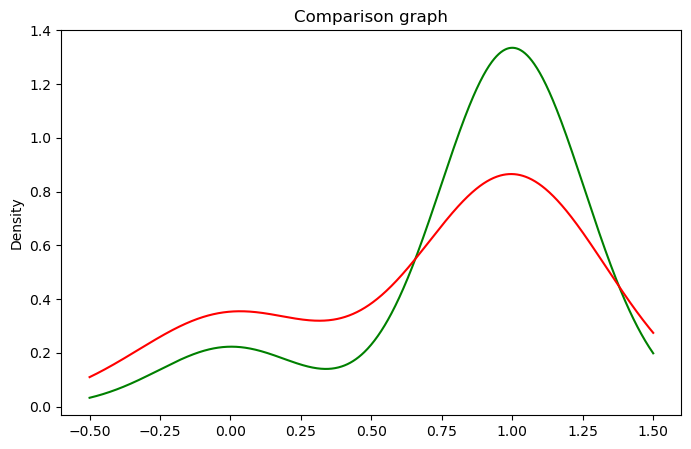

In [47]:
plt.figure(figsize=(8,5))
dataset2['Original'].plot(kind='kde',color='green') #original value
dataset2['predicted'].plot(kind='kde',color='red') #predicted
plt.title('Comparison graph')